In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


# Haciendo gráficos y viendo estacionariedad

In [2]:
# Chequenado y guardando el nombre del archivo para leer
if os.path.exists('../../Data/googleStock/Google_Stock_Train (2010-2022).csv'):
    filename = '../../Data/googleStock/Google_Stock_Train (2010-2022).csv'

#./../: Esto indica una navegación a través de directorios. Los dos puntos (..) se utilizan 
# para representar el directorio padre. Por lo tanto, ../ significa "subir un nivel en el árbol 
# de directorios". En este caso, ../../ significa "subir dos niveles en el árbol de directorios".
#  Por ejemplo, si el archivo de origen está en /Users/tu_usuario/Documentos/Proyecto, ../../ 
# llevaría al directorio /Users/tu_usuario.

print(filename)

../../Data/googleStock/Google_Stock_Train (2010-2022).csv


In [60]:
# leyendo con pandas
import pandas as pd
df = pd.read_csv(filename)  # esta línea abre el archivo, lo lee y crea el dataframe
print(df.dtypes)    # Siempre es importante saber qué tipo de dato es cada columna
df.head() # Mirando las primeras columnas
df.shape
df

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500


En la información anterior se puede ver que los timestamps (fechas), son de tipo objeto. Vamos a convertirlos a objetos datetime para poder manejarlos mejor. También vamos a hacer una inspección ocular para ver si existe alguna estacionariedad

In [64]:
df['Year'] = df.index.year
df['Month'] = df.index.month

df

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752,2010,1
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812,2010,1
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852,2010,1
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428,2010,1
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028,2010,1
...,...,...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000,2022,12
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300,2022,12
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200,2022,12


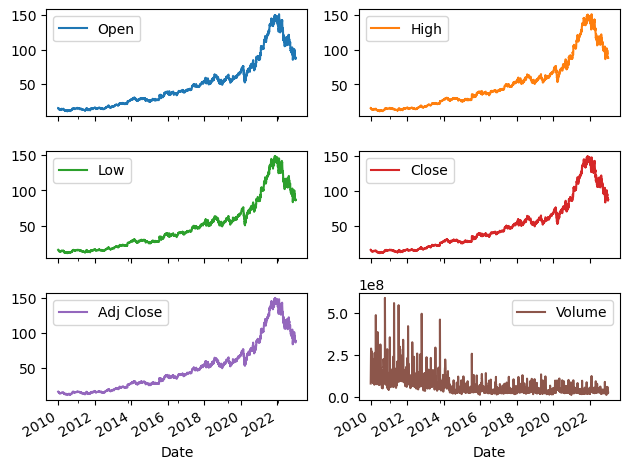

In [5]:
# Pandas tiene wrappers de matplotlib para dibujar rápidamente
df.plot(x = 'Date', subplots=True, layout=(3,2))
plt.tight_layout()
plt.show()

Claramente esta ST no es estacionaria, en ninguna de sus variables. De todos modos cuantifiquemos un poco cómo se mueve la distribución de los datos

## para ver las graficas de datos cruzados

array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Adj Close', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Adj Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Adj Close', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes:

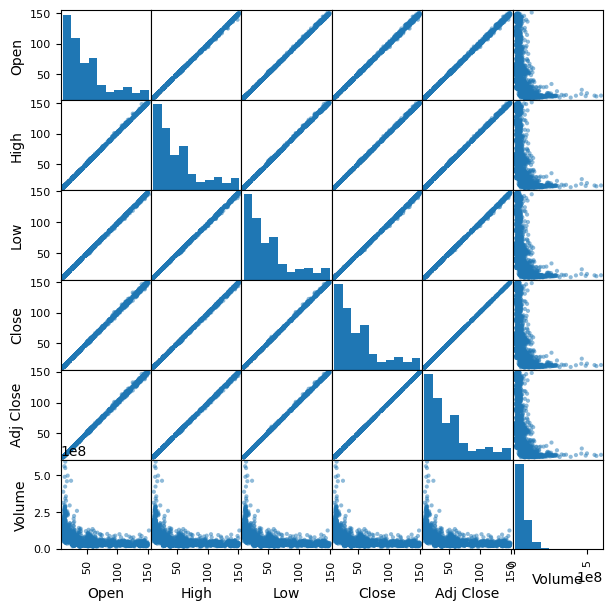

In [14]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize = (7,7))

<Axes: >

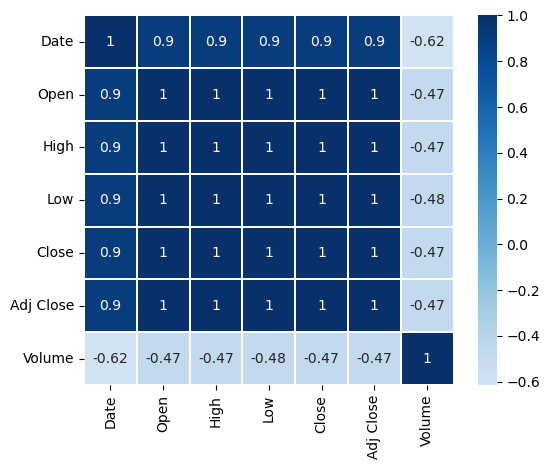

In [38]:
import seaborn as sns

correlation = df.corr()

sns.heatmap(correlation, cmap='Blues',vmax=1,center=0,square=True,linewidths=.1,annot = True)

## Densidad de probabilidad por mes


In [74]:
datos_que_quiero = df.columns[:-2]
datos_que_quiero

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

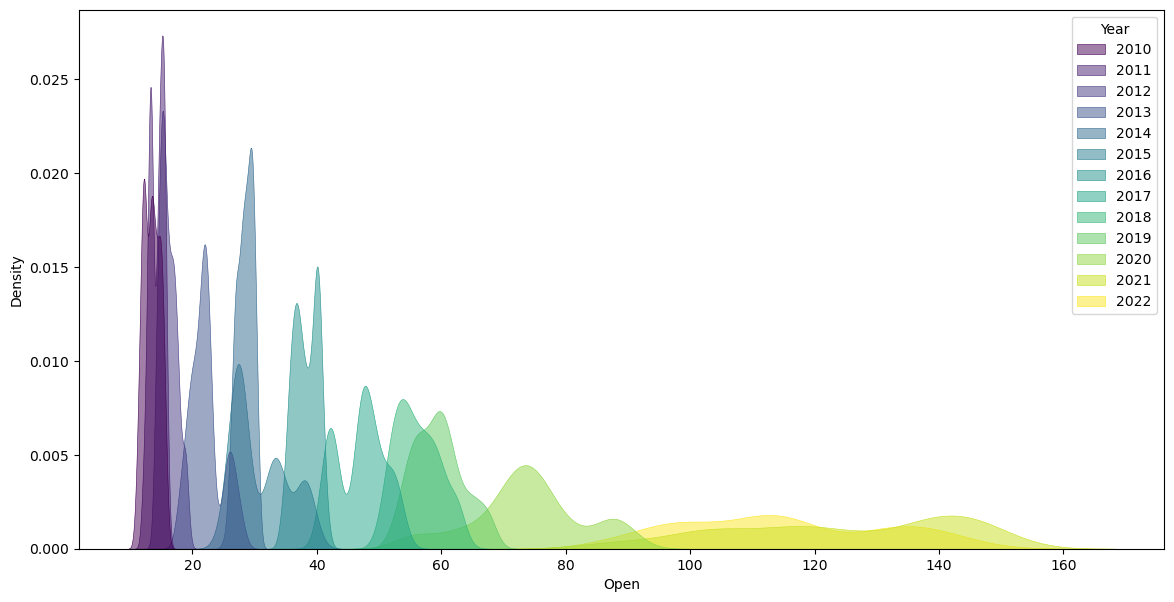

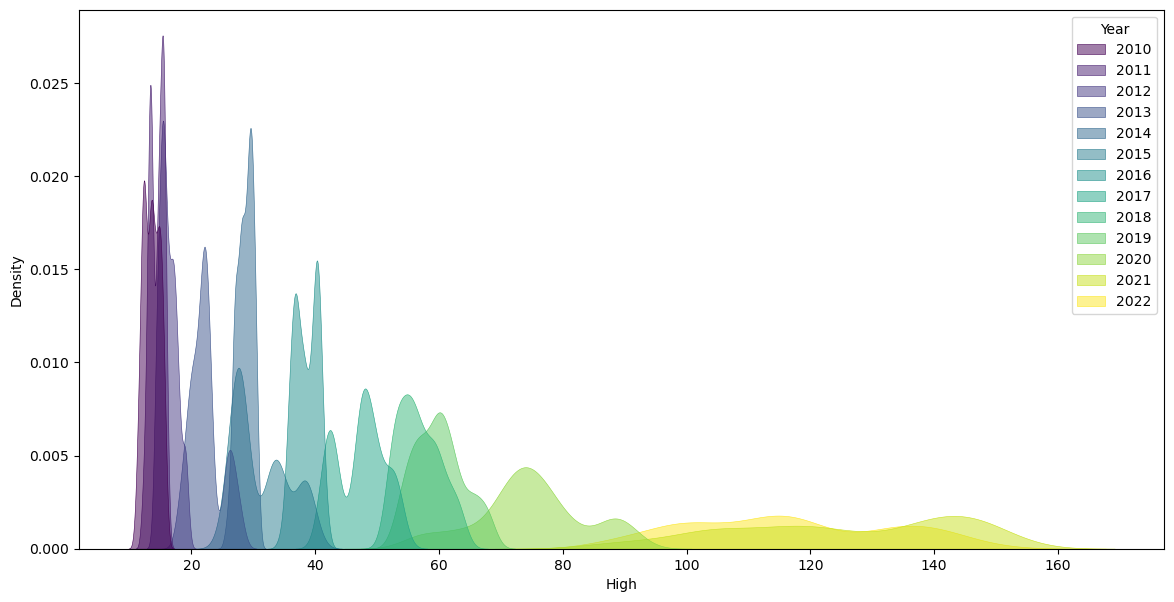

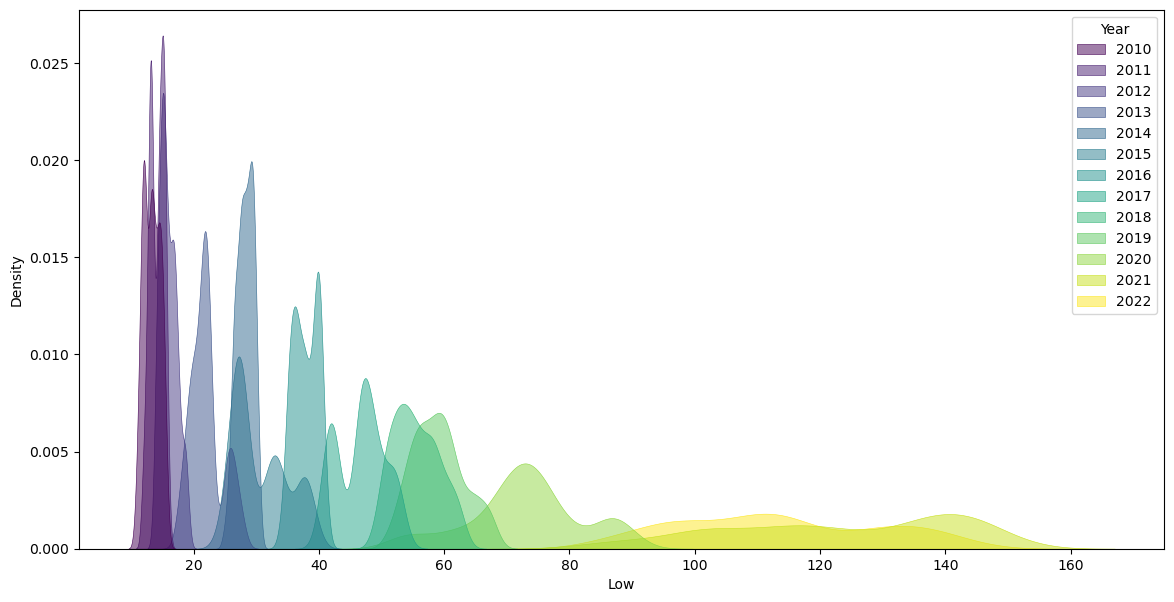

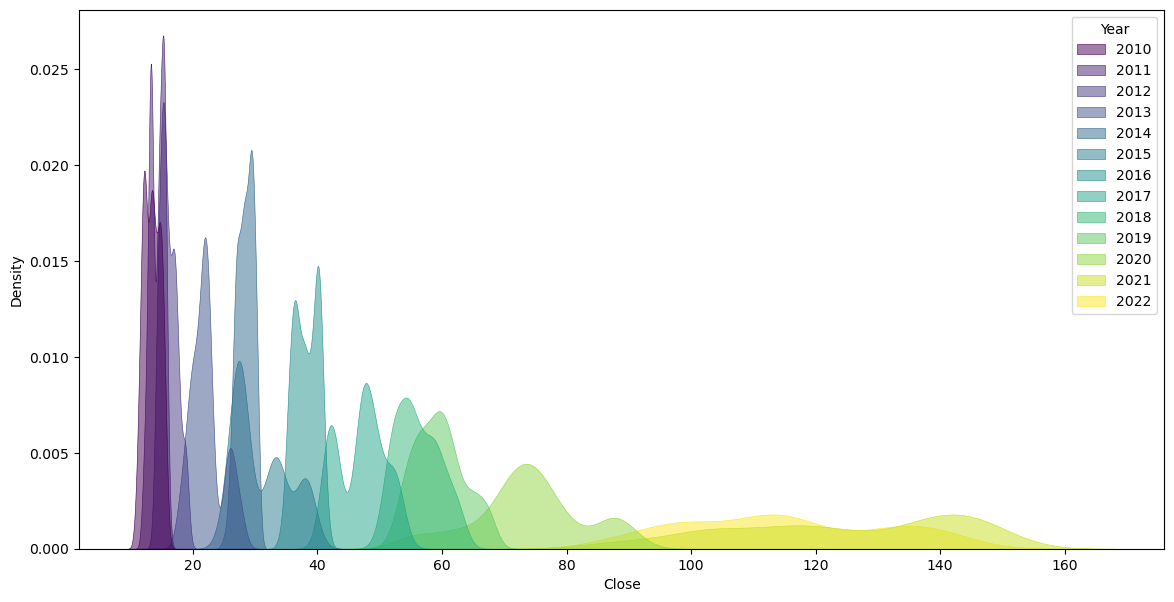

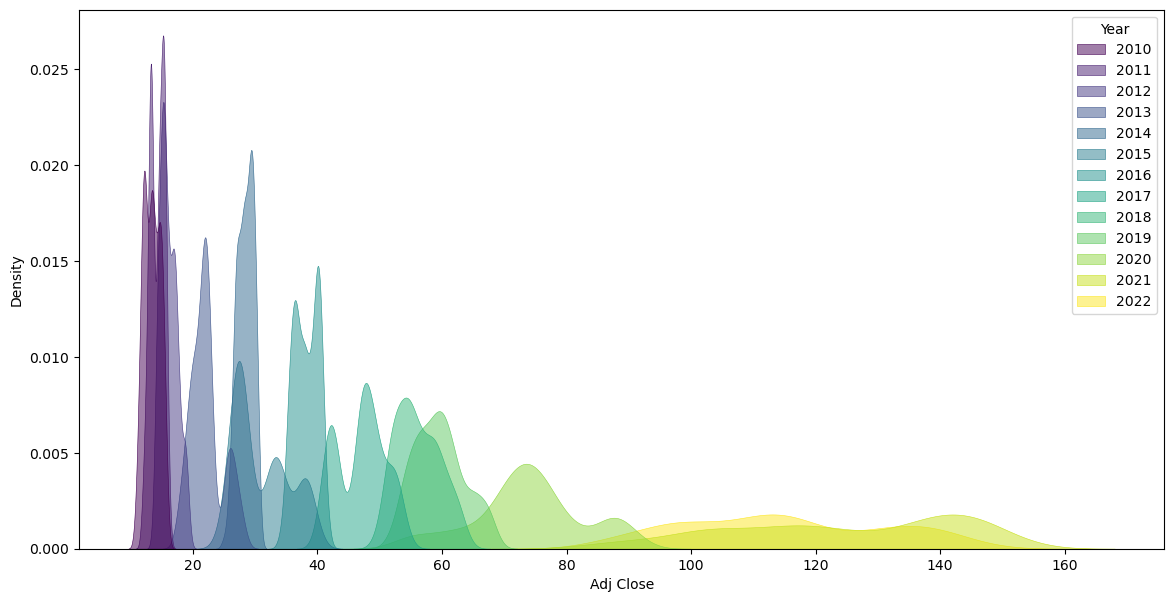

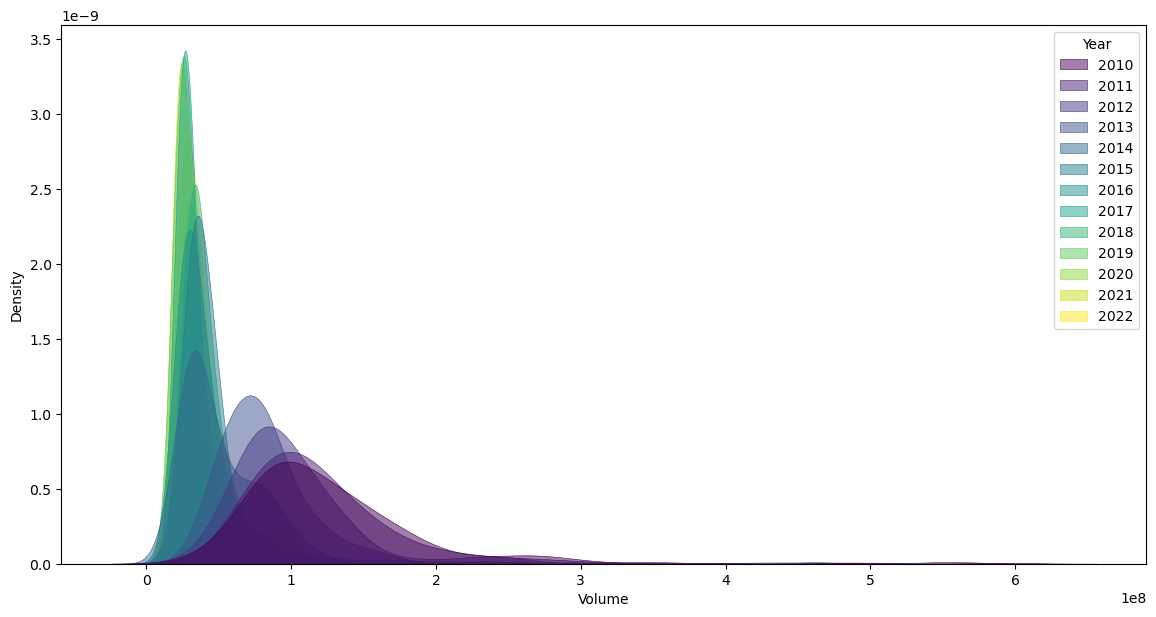

In [83]:
for i in datos_que_quiero:
    fig, ax = plt.subplots(figsize=(14,7))
    sns.kdeplot(data=df,x=i,hue = 'Year', fill=True, alpha=.5, linewidth=0.4, palette='viridis',)

# Analizando la distribución cada 60 dias 

Veremos la evolución de las medias y las varianazas, una manera de observar cómo varía la distribución de datos en ventanas temporales

In [6]:
# timedelta nos sirve para operar con intervalos de tiempo
from datetime import timedelta

delta = timedelta(days = 60) # estos 60 días son corridos, no se corresponden con días con datos
d = df.Date.iloc[0] # es la primera fecha de los datos, la primera medicion hecha en el 2010-01-04
medias = []
varianzas = []
tstamps = []
while d < df.Date.iloc[-1]:#aca esta el ultimo dia de medida  # while se ejecuta siempre que se cumpla la condición
    mask_1 = df.Date >= d #la desigualdades devueven un valor boleano
    mask_2 = df.Date < d + delta
    medias.append(df.loc[mask_1 & mask_2].to_numpy(dtype=np.float64)[:,1:].mean(axis=0)) # & es el operador and bit a bit, sino no funciona
    varianzas.append(df.loc[mask_1 & mask_2].to_numpy(dtype=np.float64)[:,1:].std(axis = 0)) # comprender esta operacion
    tstamps.append(d)
    d += delta
medias = np.array(medias)
varianzas=np.array(varianzas)
tstamps = [d.date() for d in tstamps]

In [7]:
tstamps

[datetime.date(2010, 1, 4),
 datetime.date(2010, 3, 5),
 datetime.date(2010, 5, 4),
 datetime.date(2010, 7, 3),
 datetime.date(2010, 9, 1),
 datetime.date(2010, 10, 31),
 datetime.date(2010, 12, 30),
 datetime.date(2011, 2, 28),
 datetime.date(2011, 4, 29),
 datetime.date(2011, 6, 28),
 datetime.date(2011, 8, 27),
 datetime.date(2011, 10, 26),
 datetime.date(2011, 12, 25),
 datetime.date(2012, 2, 23),
 datetime.date(2012, 4, 23),
 datetime.date(2012, 6, 22),
 datetime.date(2012, 8, 21),
 datetime.date(2012, 10, 20),
 datetime.date(2012, 12, 19),
 datetime.date(2013, 2, 17),
 datetime.date(2013, 4, 18),
 datetime.date(2013, 6, 17),
 datetime.date(2013, 8, 16),
 datetime.date(2013, 10, 15),
 datetime.date(2013, 12, 14),
 datetime.date(2014, 2, 12),
 datetime.date(2014, 4, 13),
 datetime.date(2014, 6, 12),
 datetime.date(2014, 8, 11),
 datetime.date(2014, 10, 10),
 datetime.date(2014, 12, 9),
 datetime.date(2015, 2, 7),
 datetime.date(2015, 4, 8),
 datetime.date(2015, 6, 7),
 datetime.dat

In [8]:
# veamos la estructura de los datos obtenidos en las listas
print(f'N de elementos de medias: {len(medias)} - varianzas {len(varianzas)} - tstamps {len(tstamps)}')

N de elementos de medias: 80 - varianzas 80 - tstamps 80


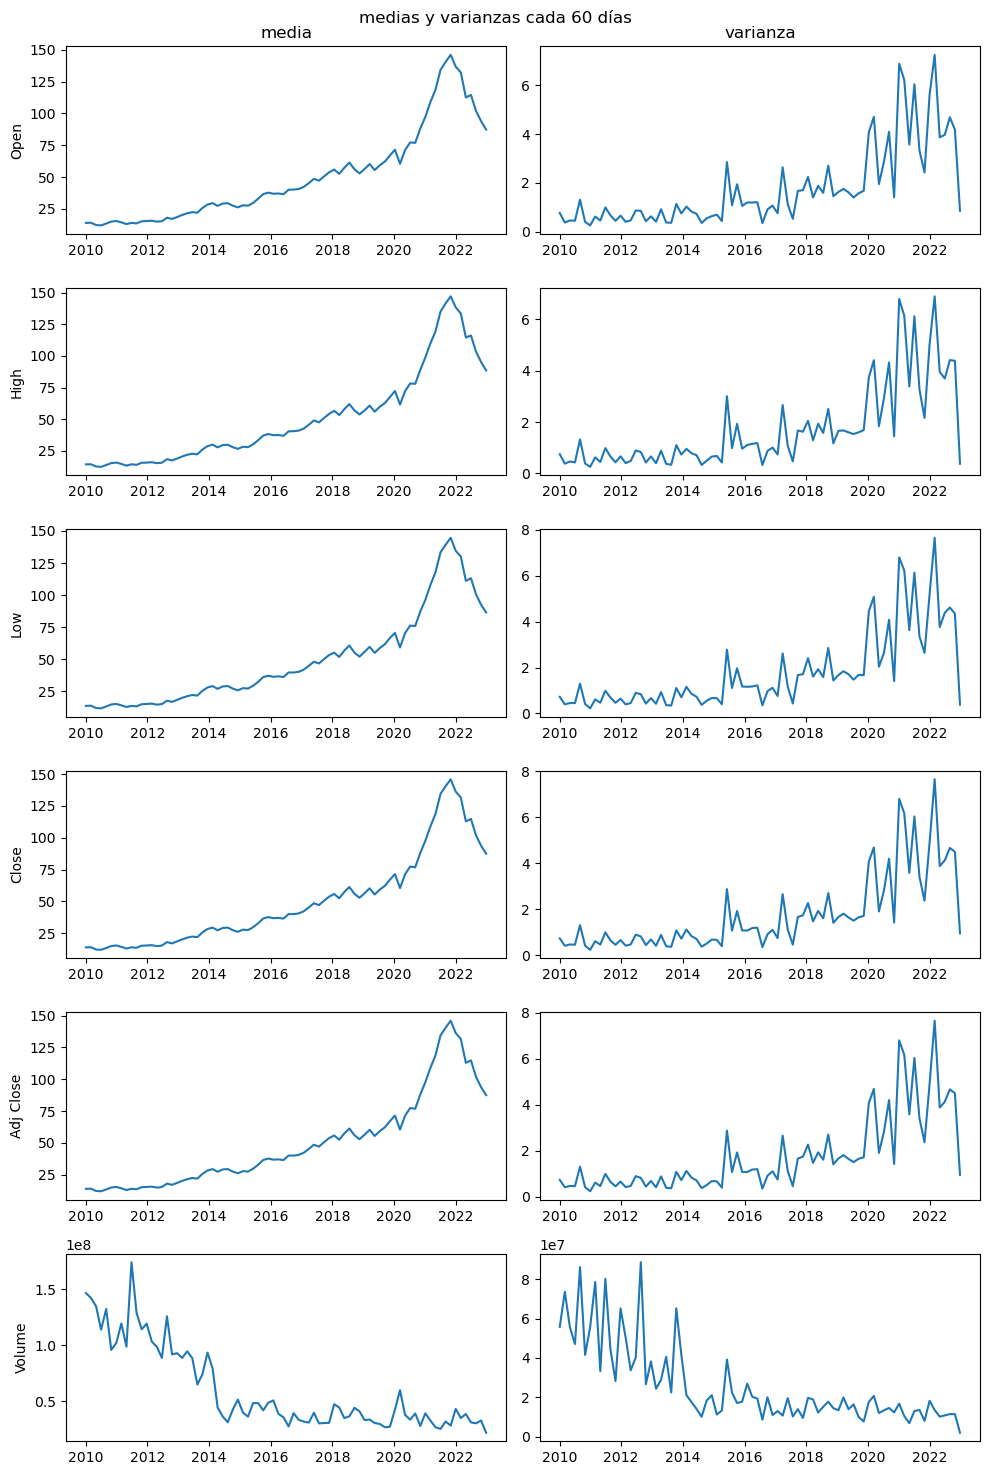

In [9]:
fig, axs = plt.subplots(6,2, figsize = (10,15))
for i in range(medias.shape[1]):
    axs[i,0].plot(tstamps, medias[:,i])
    axs[i,1].plot(tstamps, varianzas[:,i])
    axs[i,0].set_ylabel(list(df.columns)[1:][i]) # Importtante entender esta línea
axs[0,0].set_title('media')
axs[0,1].set_title('varianza')
fig.suptitle('medias y varianzas cada 60 días')
fig.tight_layout()

In [1]:
df_diff = df.diff()
df_diff['Year'] = df['Year']
df_diff['Month'] = df['Month']

NameError: name 'df' is not defined